In [7]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

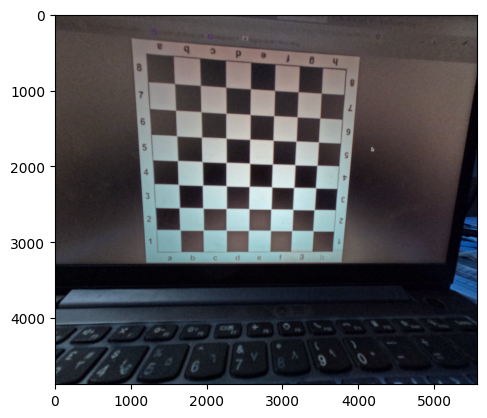

In [31]:
# Termination criteria for cornerSubPix
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            30,   # max 30 iterations
            0.001)

# your board is 4×4 inner corners (i.e. 5×5 squares)
board_size = (4, 4)
square_size = 0.035  # 3.5 cm = 0.035 m

# prepare object points
objp = np.zeros((board_size[0]*board_size[1], 3), np.float32)
objp[:, :2] = np.indices(board_size).T.reshape(-1, 2) * square_size

objpoints, imgpoints = [], []

img = cv2.imread('./checkboard_images/8x8.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)

Text(0.5, 1.0, 'gray after CLAHE and HSV boost')

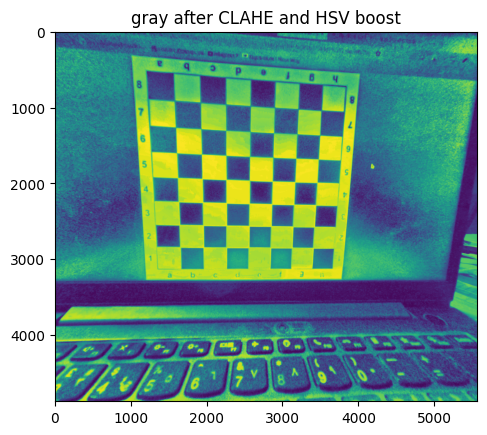

In [32]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
s = cv2.multiply(s, 1.6)  # 150% saturation
v = cv2.multiply(v, 1.6)  # 120% brightness/value
s = np.clip(s, 0, 255).astype(np.uint8)
v = np.clip(v, 0, 255).astype(np.uint8)
hsv2 = cv2.merge([h, s, v])
img_boost = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

# 2) Strong local contrast on lightness via CLAHE in LAB
lab = cv2.cvtColor(img_boost, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
l2 = clahe.apply(l)
lab2 = cv2.merge([l2, a, b])
img_boost = cv2.cvtColor(lab2, cv2.COLOR_LAB2BGR)

gray_boosted = cv2.cvtColor(img_boost, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_boosted)
plt.title("gray after CLAHE and HSV boost")

Text(0.5, 1.0, 'gray dialated')

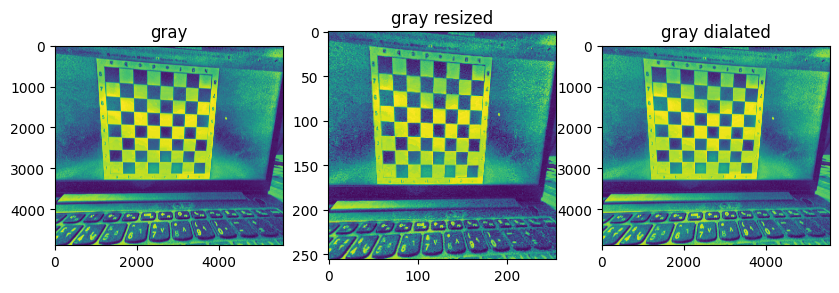

In [33]:
# what is a good kern to put for dilaation
gray_boosted_resized = cv2.resize(gray_boosted, (256, 256))

kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
gray_dialatd = cv2.dilate(gray_boosted, kern, iterations=1)

plt.figure(figsize=(10, 11))

plt.subplot(131)
plt.imshow(gray_boosted)
plt.title("gray")

plt.subplot(132)
plt.imshow(gray_boosted_resized)
plt.title("gray resized")

plt.subplot(133)
plt.imshow(gray_dialatd)
plt.title("gray dialated")

In [38]:
# 4) find corners on the cleaned mask
board_size = (7, 7)
found, corners = cv2.findChessboardCornersSB(
    gray,
    board_size,
    flags=(cv2.CALIB_CB_NORMALIZE_IMAGE | cv2.CALIB_CB_EXHAUSTIVE | cv2.CALIB_CB_ACCURACY | cv2.CALIB_CB_LARGER),
)

found

False

In [ ]:
# 5) refine & collect points
corners = cv2.cornerSubPix(gray_boosted, corners, (11,11), (-1,-1), criteria)
objpoints.append(objp)
imgpoints.append(corners)

# 6) show feedback
vis = cv2.drawChessboardCorners(img.copy(), board_size, corners, found)
cv2.imshow('detected', vis)
cv2.waitKey(0)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/cornersubpix.cpp:58: error: (-215:Assertion failed) count >= 0 in function 'cornerSubPix'
